In [2]:
import pandas as pd
import numpy as np

In [3]:
data = 'logins.json'

In [4]:
df = pd.read_json(data)

In [5]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
df.set_index('login_time', inplace=True)

In [8]:
#Aggregate these login counts based on 15minute time intervals
df['count'] =1
df.sort_index(inplace=True)
df = df.resample('15T').count()
df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [10]:
df.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


<Axes: xlabel='login_time'>

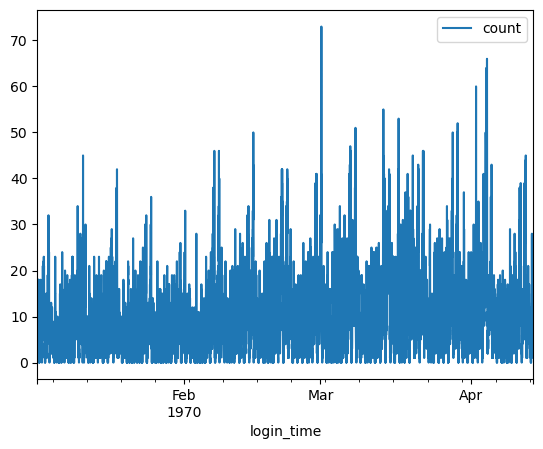

In [11]:
#Visualize and describe the resulting time series of login counts
df.plot()

<Axes: xlabel='login_time'>

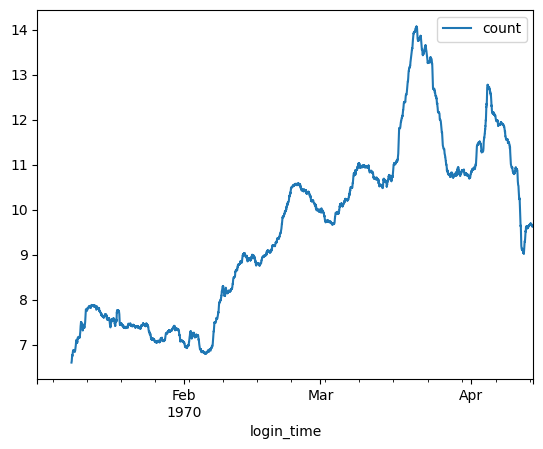

In [12]:
df.rolling(window=24*4*7).mean().plot()

In [13]:
df['day_name'] = df.index.map(lambda x:x.day_name())
df['dayofweek'] = df.index.map(lambda x:x.dayofweek)
df['hour'] = df.index.map(lambda x:x.hour)

In [14]:
df.head()

,count,day_name,dayofweek,hour
login_time,,,,
1970-01-01 20:00:00,2,Thursday,3,20
1970-01-01 20:15:00,6,Thursday,3,20
1970-01-01 20:30:00,9,Thursday,3,20
1970-01-01 20:45:00,7,Thursday,3,20
1970-01-01 21:00:00,1,Thursday,3,21


<Axes: xlabel='dayofweek,day_name'>

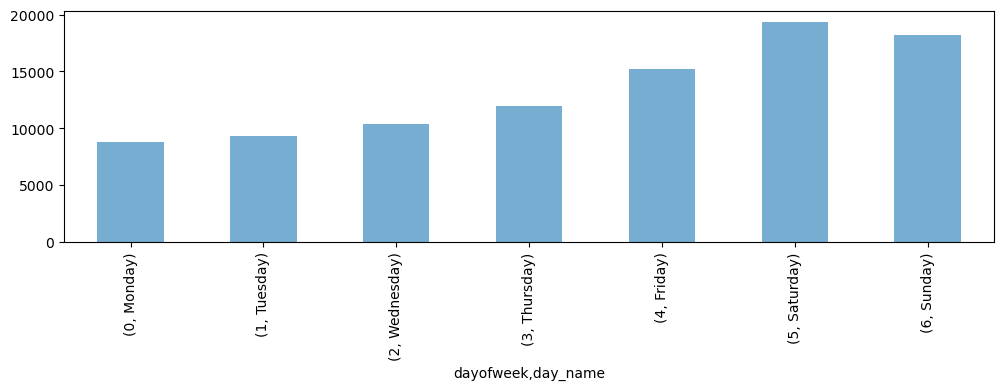

In [15]:
df_dayofweek = df.groupby(["dayofweek", "day_name"])['count'].sum()
df_dayofweek.plot.bar(x='day_name', y='count', alpha=0.6, figsize=(12,3))

<Axes: xlabel='hour'>

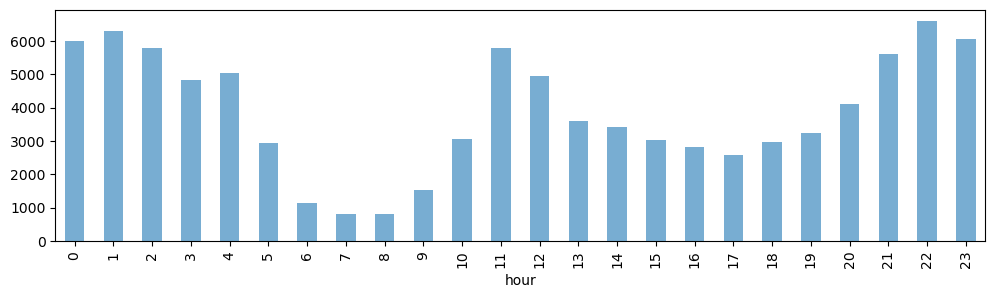

In [16]:
df_hour = df.groupby(["hour"])['count'].sum()
df_hour.plot.bar(x='hour', y='count', alpha=0.6, figsize=(12,3))